# Term Project01 - DSC680,Fall 2024 - T301 Applied Data Science(2251-1)


## Project01 Title:  Predicting Customer Churn for a Telecommunications Company

In [1]:
# Assignment: Project01 - Milestone 03
# Author by:  Debabrata Mishra
# Date: 2024-09-14

# Project01- Milestone 03 - Python Code

## Data Set Overview

In [2]:
# Imports
import pandas as pd
import numpy as np
from textblob import TextBlob
from sklearn.metrics import accuracy_score
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import re
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import power_transform
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression


In [3]:
# Import the movie review data as a data frame and ensure that the data is loaded properly.
telco_data_df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Print the dimensions (number of rows and columns) of the dataset.
num_rows, num_cols = telco_data_df.shape
print("\nNumber of rows in the Dataset    : ", num_rows)
print("Number of columns in the Dataset : ", num_cols)

# Print the first 5 rows of the dataset.
print("\n")
telco_data_df.head()


Number of rows in the Dataset    :  7043
Number of columns in the Dataset :  21




,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# visualize column informations

telco_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# check unique values of each column
for column in telco_data_df.columns:
    print('Column: {} - Unique Values: {}'.format(column, telco_data_df[column].unique()))

Column: customerID - Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column: gender - Unique Values: ['Female' 'Male']
Column: SeniorCitizen - Unique Values: [0 1]
Column: Partner - Unique Values: ['Yes' 'No']
Column: Dependents - Unique Values: ['No' 'Yes']
Column: tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column: PhoneService - Unique Values: ['No' 'Yes']
Column: MultipleLines - Unique Values: ['No phone service' 'No' 'Yes']
Column: InternetService - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity - Unique Values: ['No' 'Yes' 'No internet service']
Column: OnlineBackup - Unique Values: ['Yes' 'No' 'No internet service']
Column: DeviceProtection - Unique Values: ['No' 'Yes' 'No internet service']
Column: TechSuppor

## Data Visualization

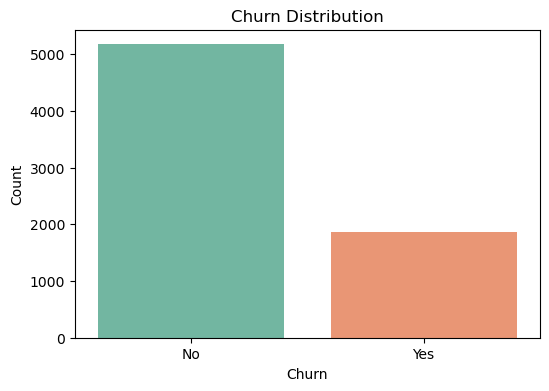

In [6]:
# Churn Distribution: Visualize the distribution of churned vs. non-churned customers.

plt.figure(figsize=(6, 4))
sns.countplot(data=telco_data_df, x='Churn', palette='Set2')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


Explanation: 

This bar plot visualizes the distribution of churned vs. non-churned customers in the dataset. The "Churn" variable is binary, with "Yes" indicating churned customers and "No" indicating non-churned customers.

Analysis:

The graph shows that the dataset has an imbalanced distribution of churned and non-churned customers, with a higher count of non-churned customers (represented by "No"). Understanding this imbalance is important because it may affect the performance of machine learning models. In cases of imbalanced data, model accuracy alone can be misleading, and other metrics like precision and recall become more critical for evaluation.

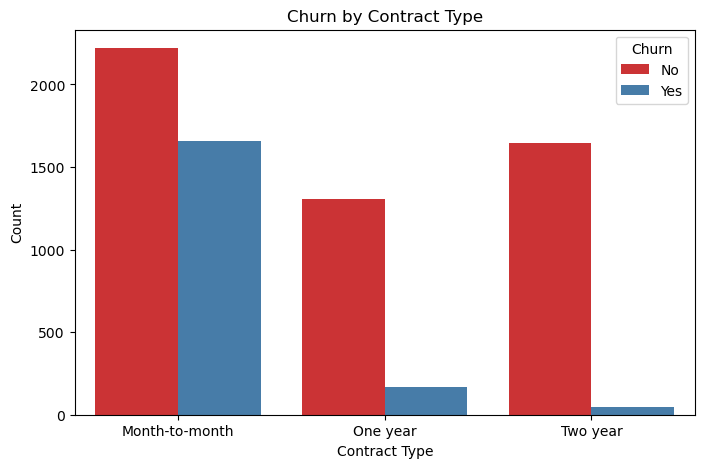

In [7]:
# Churn by Contract Type: Explore how churn varies with different contract types.

plt.figure(figsize=(8, 5))
sns.countplot(data=telco_data_df, x='Contract', hue='Churn', palette='Set1')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

Explanation: 

This count plot illustrates how churn varies based on different contract types ("Month-to-month," "One year," and "Two year").

Analysis:

Customers with "Month-to-month" contracts have a higher likelihood of churning compared to those with longer-term contracts.
"Two year" contract customers have the lowest churn rate, indicating that longer contract durations may lead to higher customer retention. This graph highlights the potential impact of contract type on customer churn, which can be valuable information for decision-makers in the telecommunications company.

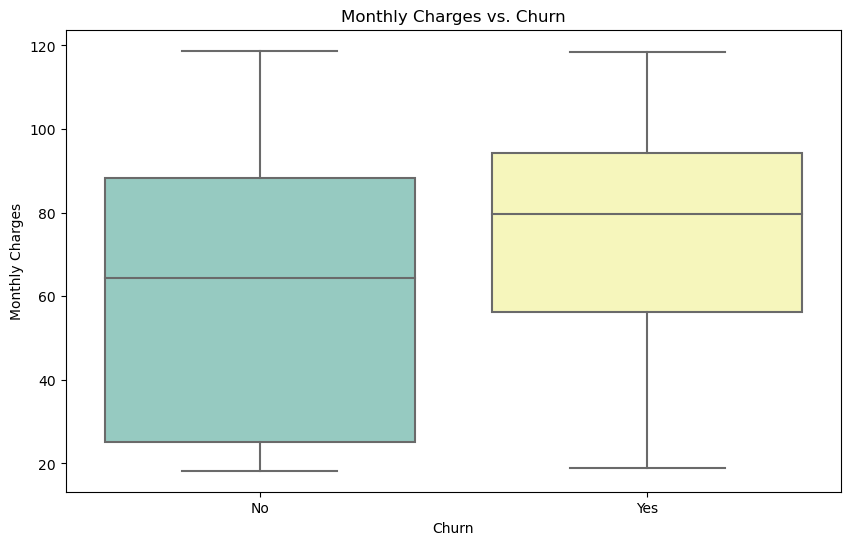

In [8]:
# Monthly Charges vs. Churn: Investigate the relationship between monthly charges and churn.

plt.figure(figsize=(10, 6))
sns.boxplot(data=telco_data_df, x='Churn', y='MonthlyCharges', palette='Set3')
plt.title('Monthly Charges vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

Explanation: 

This box plot compares the distribution of monthly charges for churned and non-churned customers.

Analysis:

Churned customers tend to have higher median monthly charges compared to non-churned customers.

The interquartile range (IQR) for churned customers is also wider, indicating a broader range of monthly charges among those who churn. 

This suggests that customers with higher monthly charges are more likely to churn, which is a critical finding for the company's pricing and retention strategies.

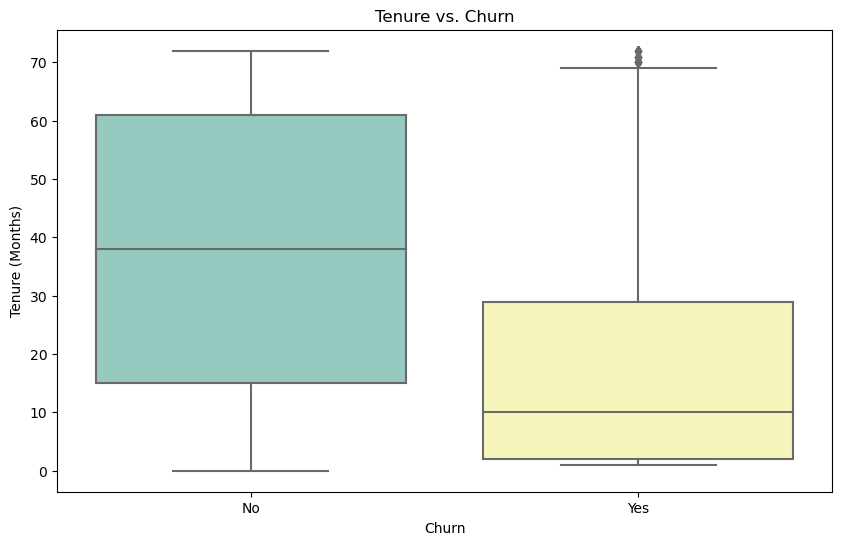

In [9]:
# Tenure vs. Churn: Examine the impact of customer tenure on churn.

plt.figure(figsize=(10, 6))
sns.boxplot(data=telco_data_df, x='Churn', y='tenure', palette='Set3')
plt.title('Tenure vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure (Months)')
plt.show()

Explanation: 

This box plot displays the distribution of customer tenure (in months) for churned and non-churned customers.

Analysis:

Churned customers generally have shorter tenures (lower median) compared to non-churned customers.

Non-churned customers tend to have longer-lasting relationships with the company.

Shorter tenure appears to be associated with a higher likelihood of churn, which emphasizes the importance of retaining customers during their early stages with the company.

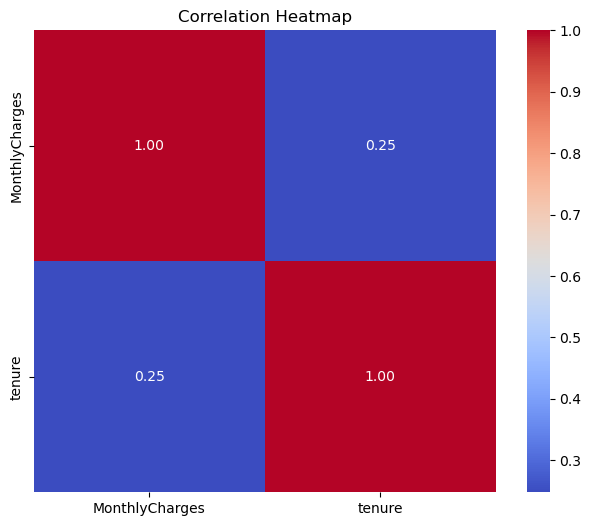

In [10]:
# Calculate the correlation matrix for numerical variables
correlation_matrix = telco_data_df[['MonthlyCharges', 'tenure']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()

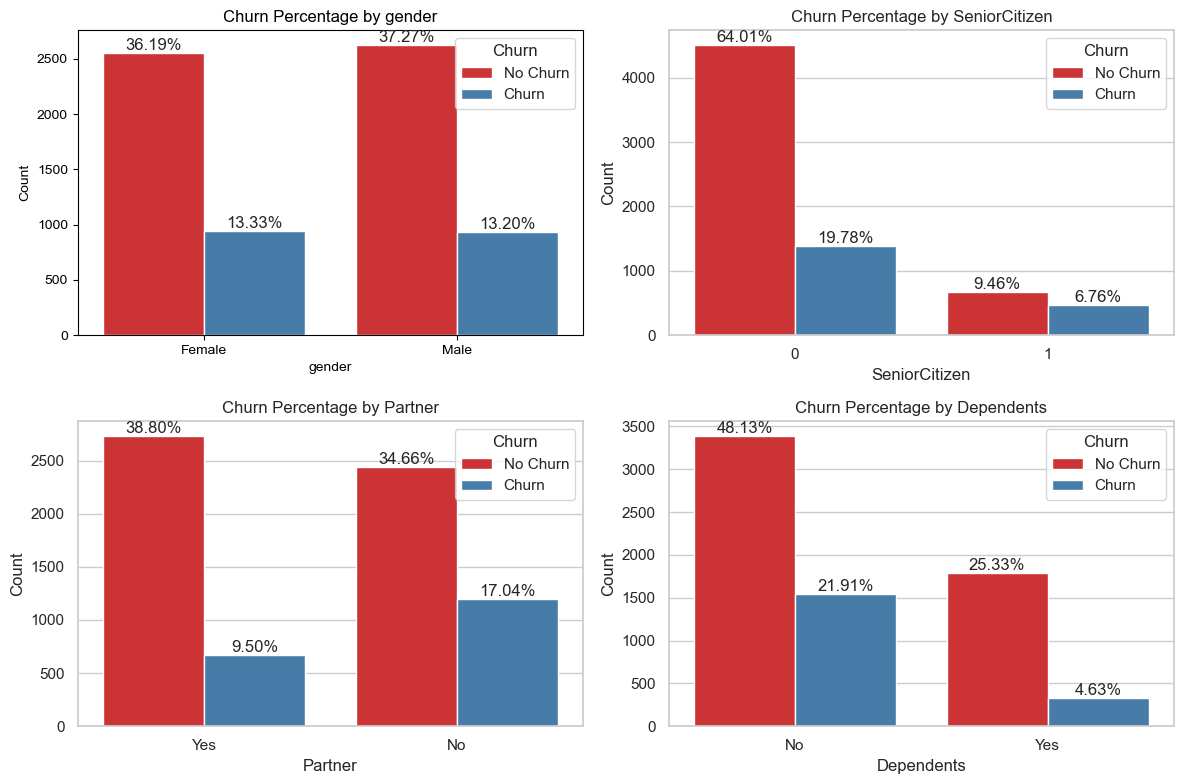

In [11]:
# Define the demographic attributes
demographic_attributes = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# Create a 2x2 grid for subplots
fig = plt.figure(figsize=(12, 8))
gs = GridSpec(2, 2)

for i, attribute in enumerate(demographic_attributes):
    row = i // 2
    col = i % 2
    
    ax = fig.add_subplot(gs[row, col])
    
    # Create a count plot with the specified attribute on the x-axis
    sns.set(style="whitegrid")
    ax = sns.countplot(data=telco_data_df, x=attribute, hue='Churn', palette='Set1')
    
    # Calculate percentages for each category of the attribute
    total = len(telco_data_df[telco_data_df[attribute] == telco_data_df[attribute]])
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height/total:.2%}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom')
    
    plt.title(f'Churn Percentage by {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Count')
    plt.legend(title='Churn', loc='upper right', labels=['No Churn', 'Churn'])

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined view of all four charts
plt.show()

## Data Preparation for Model

In [13]:
#user defined function for Data Set information

def check_data(dataframe, head=5):

    print(20*"-" + "Data Set Information".center(20) + 20*"-")
    print(dataframe.info())
    print(20*"-" + "Data Set Shape".center(20) + 20*"-")
    print(dataframe.shape)
    print("\n" + 20*"-" + "The First 5 rows of Data Set".center(20) + 20*"-")
    print(dataframe.head())
    print("\n" + 20 * "-" + "The Last 5 rows of Data Set".center(20) + 20 * "-")
    print(dataframe.tail())
    print("\n" + 20 * "-" + "List of Missing Values".center(20) + 20 * "-")
    print(dataframe.isnull().sum())
    print("\n" + 40 * "-" + "Describe the Data".center(40) + 40 * "-")
    print(dataframe.describe([0.01, 0.05, 0.10, 0.50, 0.75, 0.90, 0.95, 0.99]).T)

# Get the dataset informations
check_data(telco_data_df)

--------------------Data Set Information--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-n

It appears that the dataset contains no null values. Nevertheless, we have noticed that the "TotalCharges" column has been incorrectly identified as an object datatype. This column actually represents the total amount charged to the customer and should be treated as a numeric variable. To facilitate our analysis, it is necessary to convert this column into a numeric data type. This can be accomplished using the pd.to_numeric function. By default, this function will raise an exception when it encounters non-numeric data. However, we can mitigate this by specifying the argument errors='coerce', which will bypass such cases and replace them with NaN values.

In [14]:
# Transform "TotalCharges" column into a numeric data type
telco_data_df['TotalCharges'] = pd.to_numeric(telco_data_df['TotalCharges'], errors='coerce')

In [15]:
# Let's check for the null/NaN values TotalCharges column
telco_data_df[telco_data_df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [16]:
# Use boolean indexing to filter rows where 'tenure' is equal to 0
rows_with_tenure_0 = telco_data_df[telco_data_df['tenure'] == 0]
rows_with_tenure_0

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


"TotalCharges" has 11 missing values . The same 11 rows also has 0 value for "tenure" column even though "MonthlyCharges" is not null for these entries, this information seems contradictory. Therefore, I have chosen to exclude these observations from the dataset.

In [17]:
# Drop rows with null values ( those 11 rows)
telco_data_df.dropna(inplace=True)

# Print the dimensions (number of rows and columns) of the dataset.
num_rows, num_cols = telco_data_df.shape
print("\nNumber of rows in the Dataset    : ", num_rows)
print("Number of columns in the Dataset : ", num_cols)


Number of rows in the Dataset    :  7032
Number of columns in the Dataset :  21


The "customerID" column does not provide any valuable information for predicting whether a customer will churn. Consequently, we have opted to remove this column from the dataset.

In [18]:
# Drop the "customerID" column
telco_data_df = telco_data_df.drop(['customerID'], axis=1)

# Print the dimensions (number of rows and columns) of the dataset.
num_rows, num_cols = telco_data_df.shape
print("\nNumber of rows in the Dataset    : ", num_rows)
print("Number of columns in the Dataset : ", num_cols)


Number of rows in the Dataset    :  7032
Number of columns in the Dataset :  20


Creating dummy variables for categorical variables like 'Contract' is a common practice in data analysis and modeling.Creating dummy variables helps prevent bias in the model. If you don't create dummy variables, the algorithm might assign weights to numeric values in a way that doesn't make sense for categorical data.

The 'Contract' column with three categories: 'Month-to-Month,' 'One Year,' and 'Two Year.' You would create two dummy variables:

Contract_Month_to_Month: 1 if the contract is 'Month-to-Month,' 0 otherwise.

Contract_One_Year: 1 if the contract is 'One Year,' 0 otherwise.

Contract_Two_Year: 1 if the contract is 'Two Year,' 0 otherwise.


In [19]:
# Create dummy variables for categorical features
telco_data_df = pd.get_dummies(telco_data_df, columns=['Contract'])

In [20]:
print("\n" + 40 * "-" + "Describe the Data".center(40) + 40 * "-")
print(telco_data_df.describe([0.01, 0.05, 0.10, 0.50, 0.75, 0.90, 0.95, 0.99]).T)


----------------------------------------           Describe the Data            ----------------------------------------
                          count         mean          std    min    1%  \
SeniorCitizen            7032.0     0.162400     0.368844   0.00   0.0   
tenure                   7032.0    32.421786    24.545260   1.00   1.0   
MonthlyCharges           7032.0    64.798208    30.085974  18.25  19.2   
TotalCharges             7032.0  2283.300441  2266.771362  18.80  19.9   
Contract_Month-to-month  7032.0     0.551052     0.497422   0.00   0.0   
Contract_One year        7032.0     0.209329     0.406858   0.00   0.0   
Contract_Two year        7032.0     0.239619     0.426881   0.00   0.0   

                             5%    10%       50%        75%       90%  \
SeniorCitizen             0.000   0.00     0.000     0.0000     1.000   
tenure                    1.000   2.00    29.000    55.0000    69.000   
MonthlyCharges           19.650  20.05    70.350    89.8625   102.

Prior to inputting the categorical variables into the machine learning model, it is essential to transform them into a numeric format. We will achieve this by employing Scikit-Learn's label encoder for the encoding process.

In [21]:
# Encoding Categorical Variables
categorical_f = telco_data_df.drop(['TotalCharges','MonthlyCharges','SeniorCitizen','tenure'],axis=1)
categorical_f.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Yes,Electronic check,No,1,0,0
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,No,Mailed check,No,0,1,0
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Yes,Mailed check,Yes,1,0,0
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,No,Bank transfer (automatic),No,0,1,0
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Yes,Electronic check,Yes,1,0,0


In [22]:
le = preprocessing.LabelEncoder()
telco_data_df_cat = categorical_f.apply(le.fit_transform)
telco_data_df_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,1,0,0,1,0,0,2,0,0,0,0,1,2,0,1,0,0
1,1,0,0,1,0,0,2,0,2,0,0,0,0,3,0,0,1,0
2,1,0,0,1,0,0,2,2,0,0,0,0,1,3,1,1,0,0
3,1,0,0,0,1,0,2,0,2,2,0,0,0,0,0,0,1,0
4,0,0,0,1,0,1,0,0,0,0,0,0,1,2,1,1,0,0


In [23]:
# Get the non Categorical/numerical  features 
telco_data_df_non= telco_data_df[['TotalCharges','MonthlyCharges','SeniorCitizen','tenure']]
telco_data_df_non.head()

,TotalCharges,MonthlyCharges,SeniorCitizen,tenure
0,29.85,29.85,0,1
1,1889.50,56.95,0,34
2,108.15,53.85,0,2
3,1840.75,42.30,0,45
4,151.65,70.70,0,2


In [24]:
# Merge the non-Categorical features  and Categorical features 
telco_data_df_01 = pd.merge(telco_data_df_non, telco_data_df_cat, left_index=True, right_index=True)

# Print the dimensions (number of rows and columns) of the dataset.
num_rows, num_cols = telco_data_df_01.shape
print("\nNumber of rows in the Dataset    : ", num_rows)
print("Number of columns in the Dataset : ", num_cols)


Number of rows in the Dataset    :  7032
Number of columns in the Dataset :  22


Standardizing the numerical columns are important for preparing the data for machine learning models, as they can improve model performance and prevent issues related to the scale of features.

In [25]:
# Standardize for numeric variables.
num_cols = ['TotalCharges','MonthlyCharges','tenure']
scaler = StandardScaler()
telco_data_df_01[num_cols] = scaler.fit_transform(telco_data_df_01[num_cols])

telco_data_df_01[num_cols].head()

,TotalCharges,MonthlyCharges,tenure
0,-0.994194,-1.161694,-1.280248
1,-0.173740,-0.260878,0.064303
2,-0.959649,-0.363923,-1.239504
3,-0.195248,-0.747850,0.512486
4,-0.940457,0.196178,-1.239504


In [26]:
# To find the number of churners and non-churners in the dataset:
telco_data_df_01["Churn"].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

Now I will split the dataset 80:20 ratio to create the train and test data sets. Then I will spilt the train set to features and target.

In [27]:
X = telco_data_df_01.drop(['Churn'],axis=1)
y = telco_data_df_01['Churn']
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

As previously mentioned, the dataset exhibits class imbalance, with the majority of values in the target variable belonging to a single class. In this dataset, only 27% of customers churned.

This class imbalance issue can lead to suboptimal machine learning model performance. Certain algorithms, when trained on imbalanced data, tend to predict the majority class most of the time. In our case, the model might predict that no customers churned. Although such a model would achieve a high accuracy rate (in this case, 73% accuracy), it would be of little value because it consistently predicts a single outcome.

To address this class imbalance, various techniques can be applied in machine learning. I will employ a method known as oversampling. This process involves randomly selecting samples from the minority class and adding them to the training dataset. We will oversample the minority class until the number of data points equals that of the majority class.

Oversampling will be applied exclusively to the training dataset, as the test dataset must accurately represent the true population.

In [28]:
# Check before to oversampling
train_y.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [29]:
# Oversample the training dataset
oversample = SMOTE(k_neighbors=5)
train_x_smote, train_y_smote = oversample.fit_resample(train_x, train_y)
train_x, train_y = train_x_smote, train_y_smote

In [30]:
# Check after to oversampling
train_y.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

Now the 4130 values in each class which means the training dataset is balanced. This is now ready fpr further analysis and model building Customer Churn Prediction using machine learning algorithms.

## Model Building and Evaluation

### Logistic Regression Model

In [32]:
# Instantiate the Logistic Regression model
lrg_model = LogisticRegression()

# Fit the model to the preprocessed training data
lrg_model.fit(train_x, train_y)

# Get the accuracy
lrg_model_accuracy = lrg_model.score(test_x,test_y)
print("Logistic Regression Model accuracy is :",lrg_model_accuracy)

# Predict on the preprocessed test data
lrg_model_pred_y = lrg_model.predict(test_x)

# Print classification report for Logistic Regression
print("\nLogistic Regression - Classification Report:")
print(classification_report(test_y, lrg_model_pred_y))

Logistic Regression Model accuracy is : 0.7420042643923241

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1033
           1       0.51      0.76      0.61       374

    accuracy                           0.74      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.79      0.74      0.75      1407



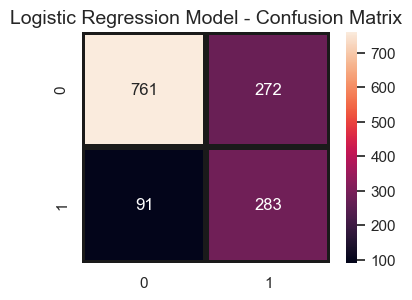

In [33]:
# Plot the confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(test_y, lrg_model_pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Logistic Regression Model - Confusion Matrix",fontsize=14)
plt.show()

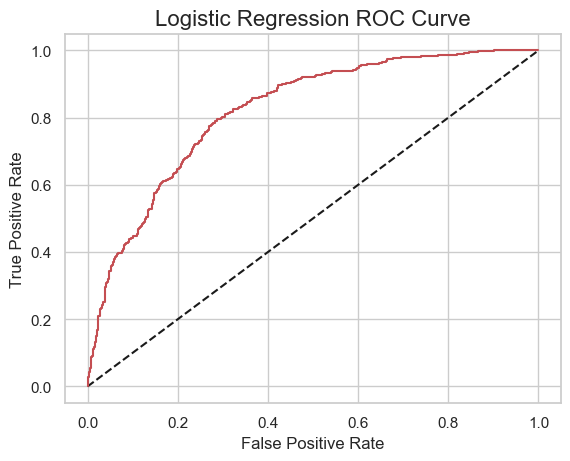

In [34]:
# Plot the ROC Curve
y_lrpred_prob = lrg_model.predict_proba(test_x)[:,1]
fpr_01, tpr_01, thresholds = roc_curve(test_y, y_lrpred_prob)

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_01, tpr_01, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)

plt.show();

##### Explanation of Logistic Regression model results 

Model Accuracy: 

The accuracy of the Logistic Regression model is 0.7413, which means that it correctly predicted the class of 74.13% of the total data points.

Classification Report:

Precision: Precision is a measure of how many of the predicted positive cases were actually positive. For class 0, the precision is 0.89, which means that when the model predicted a data point as class 0, it was correct 89% of the time. For class 1, the precision is 0.51, indicating that when the model predicted a data point as class 1, it was correct 51% of the time.

Recall: Recall is a measure of how many of the actual positive cases were correctly predicted by the model. For class 0, the recall is 0.74, which means that the model correctly identified 74% of the actual class 0 instances. For class 1, the recall is 0.76, indicating that the model correctly identified 76% of the actual class 1 instances.

F1-Score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. For class 0, the F1-score is 0.81, and for class 1, it is 0.61.

Support: Support represents the number of instances in each class. For class 0, there are 1033 instances, and for class 1, there are 374 instances.

Macro Avg: 

This is the average of precision, recall, and F1-score calculated for each class separately. In this case, the macro average precision is 0.70, macro average recall is 0.75, and macro average F1-score is 0.71.

Weighted Avg: 

This is the weighted average of precision, recall, and F1-score, where the weight is determined by the number of instances in each class. In this case, the weighted average precision is 0.79, weighted average recall is 0.74, and weighted average F1-score is 0.75.

### Random Forest Model

In [35]:
# Instantiate the RandomForestClassifier model
rf_model = RandomForestClassifier(n_jobs=-1, random_state=42)

# Fit the model to the resampled and preprocessed training data
rf_model.fit(train_x, train_y)

# Get the accuracy
rf_model_accuracy = rf_model.score(test_x,test_y)
print("Random Forest accuracy is :",rf_model_accuracy)

# Predict on the preprocessed test data
rf_model_pred_y = rf_model.predict(test_x)

# Print classification report for RandomForestClassifier
print("\nRandomForest Classifier - Classification Report:")
print(classification_report(test_y, rf_model_pred_y))

Random Forest accuracy is : 0.7633262260127932

RandomForest Classifier - Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1033
           1       0.55      0.61      0.58       374

    accuracy                           0.76      1407
   macro avg       0.70      0.72      0.71      1407
weighted avg       0.77      0.76      0.77      1407



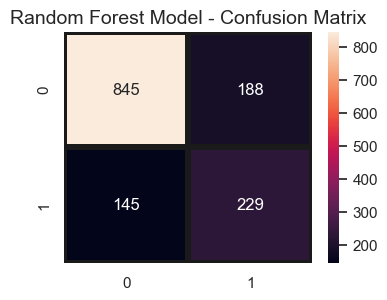

In [36]:
# Plot the confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(test_y, rf_model_pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Random Forest Model - Confusion Matrix",fontsize=14)
plt.show()

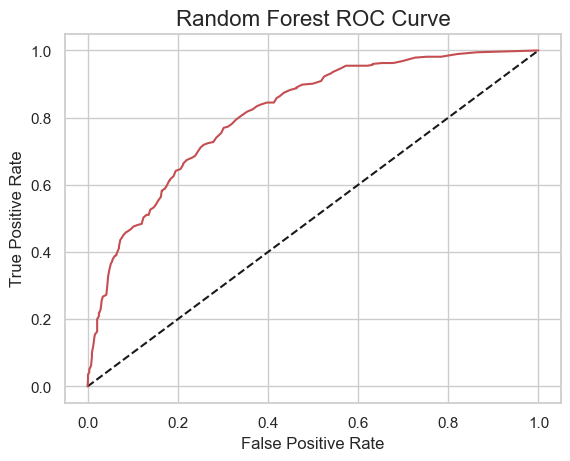

In [37]:
# Plot the ROC Curve
y_rfpred_prob = rf_model.predict_proba(test_x)[:,1]
fpr_02, tpr_02, thresholds = roc_curve(test_y, y_rfpred_prob)

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_02, tpr_02, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)

plt.show();

##### Explanation of Random Forest model results 

Model Accuracy: 

The accuracy of the Random Forest Classifier model is 0.7647, which means that it correctly predicted the class of 76.47% of the total data points.

Classification Report:

Precision: Precision is a measure of how many of the predicted positive cases were actually positive. For class 0, the precision is 0.86, which means that when the model predicted a data point as class 0, it was correct 86% of the time. For class 1, the precision is 0.55, indicating that when the model predicted a data point as class 1, it was correct 55% of the time.

Recall: Recall is a measure of how many of the actual positive cases were correctly predicted by the model. For class 0, the recall is 0.82, which means that the model correctly identified 82% of the actual class 0 instances. For class 1, the recall is 0.62, indicating that the model correctly identified 62% of the actual class 1 instances.

F1-Score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. For class 0, the F1-score is 0.84, and for class 1, it is 0.58.

Support: Support represents the number of instances in each class. For class 0, there are 1033 instances, and for class 1, there are 374 instances.

Macro Avg: 

This is the average of precision, recall, and F1-score calculated for each class separately. In this case, the macro average precision is 0.70, macro average recall is 0.72, and macro average F1-score is 0.71.

Weighted Avg: 
    
This is the weighted average of precision, recall, and F1-score, where the weight is determined by the number of instances in each class. In this case, the weighted average precision is 0.78, weighted average recall is 0.76, and weighted average F1-score is 0.77.



### Gradient Boosting Classifier

In [38]:
# Instantiate the RandomForestClassifier model
gb_model = GradientBoostingClassifier()

# Fit the model to the resampled and preprocessed training data
gb_model.fit(train_x, train_y)

# Get the accuracy
gb_model_accuracy = gb_model.score(test_x,test_y)
print("Gradient Boosting Classifier accuracy is :",gb_model_accuracy)

# Predict on the preprocessed test data
gb_model_pred_y = gb_model.predict(test_x)

# Print classification report for RandomForestClassifier
print("\nGradient Boosting Classifier - Classification Report:")
print(classification_report(test_y, gb_model_pred_y))

Gradient Boosting Classifier accuracy is : 0.7427149964463398

Gradient Boosting Classifier - Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1033
           1       0.51      0.73      0.60       374

    accuracy                           0.74      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.79      0.74      0.75      1407



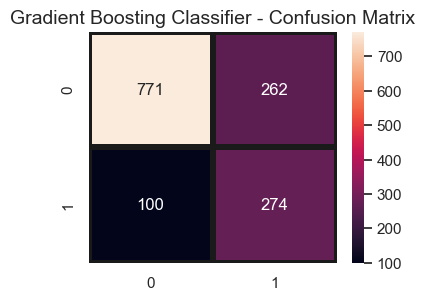

In [39]:
# Plot the confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(test_y, gb_model_pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Gradient Boosting Classifier - Confusion Matrix",fontsize=14)
plt.show()

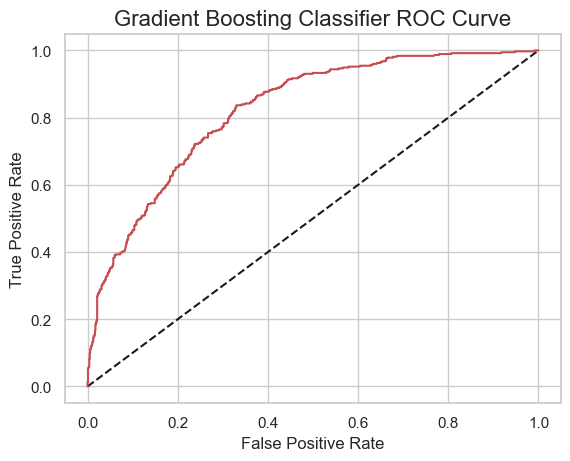

In [40]:
# Plot the ROC Curve
y_gbpred_prob = gb_model.predict_proba(test_x)[:,1]
fpr_03, tpr_03, thresholds = roc_curve(test_y, y_gbpred_prob)

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_03, tpr_03, label='Gradient Boosting Classifier',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting Classifier ROC Curve',fontsize=16)

plt.show();

##### Explanation of Gradient Boosting Classifier results 

Model Accuracy: 

The accuracy of the Gradient Boosting Classifier  is 0.7420, which means that it correctly predicted the class of 74.20% of the total data points.

Classification Report:

Precision: Precision is a measure of how many of the predicted positive cases were actually positive. For class 0, the precision is 0.88, which means that when the model predicted a data point as class 0, it was correct 88% of the time. For class 1, the precision is 0.51, indicating that when the model predicted a data point as class 1, it was correct 51% of the time.

Recall: Recall is a measure of how many of the actual positive cases were correctly predicted by the model. For class 0, the recall is 0.75, which means that the model correctly identified 75% of the actual class 0 instances. For class 1, the recall is 0.73, indicating that the model correctly identified 73% of the actual class 1 instances.

F1-Score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. For class 0, the F1-score is 0.81, and for class 1, it is 0.60.

Support: Support represents the number of instances in each class. For class 0, there are 1033 instances, and for class 1, there are 374 instances.

Macro Avg: 

This is the average of precision, recall, and F1-score calculated for each class separately. In this case, the macro average precision is 0.70, macro average recall is 0.74, and macro average F1-score is 0.70.

Weighted Avg: 

This is the weighted average of precision, recall, and F1-score, where the weight is determined by the number of instances in each class. In this case, the weighted average precision is 0.78, weighted average recall is 0.74, and weighted average F1-score is 0.75.

## Conclusion

All three models are relatively close in terms of accuracy, with the Random Forest model having a slightly higher accuracy compared to the others.

The Logistic Regression model seems to perform better in terms of precision for non-churning customers (class 0), but the Random Forest and Gradient Boosting models have a better balance between precision and recall for churning customers (class 1).

The Random Forest model has a higher F1-score for class 1, indicating better trade-offs between precision and recall for churning customers.

The Gradient Boosting model has a high precision for non-churning customers (class 0), but its precision for churning customers is lower compared to the Random Forest model.


As my assignment goal is to prioritize identifying customers who are likely to churn (high recall for class 1), the Random Forest model may be a good choice. But if we look for an overall balanced performance, the Gradient Boosting model might be considered. Further fine-tuning and evaluation of these models on various metrics and better collection of data can help in making a final decision based on your specific needs and constraints